## Data Preparation

In [1]:
import pandas as pd

output_path = './Salary_Data2.csv'
path = output_path
df = pd.read_csv(output_path)
display(df.head())

,YearsExperience,EducationLevel,City,Salary
0,3.0,大學,城市A,45.9
1,7.8,碩士以上,城市C,80.5
2,2.3,高中以下,城市A,25.2
3,5.1,高中以下,城市A,30.4
4,10.0,碩士以上,城市B,65.7


In [2]:
# df.info()
# df.describe(include='all').round(2)

#round 函数在 Python（包括 Pandas 库中）的功能是对浮点数进行四舍五入到给定的精度。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  36 non-null     float64
 1   EducationLevel   36 non-null     object 
 2   City             36 non-null     object 
 3   Salary           36 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


,YearsExperience,EducationLevel,City,Salary
count,36.00,36,36,36.00
unique,NaN,3,3,NaN
top,NaN,碩士以上,城市A,NaN
freq,NaN,16,20,NaN
mean,5.47,NaN,NaN,51.70
std,2.71,NaN,NaN,17.53
min,1.20,NaN,NaN,24.90
25%,3.38,NaN,NaN,38.05
50%,5.15,NaN,NaN,49.20
75%,7.65,NaN,NaN,65.75


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

encoder = OneHotEncoder()
city_encoded = encoder.fit_transform(df[['City']]).toarray()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['YearsExperience', 'Salary']])

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['EducationLevel'])

x = np.hstack([scaled_features, city_encoded])
y = labels
# display(x.head(5))


In [5]:
display(y)

array([0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1,
       1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0])

In [6]:
# splitting dataset to training set and testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)

##  data visualization


## Build ANN model

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
    # Dense(1, input_shape=(1,), activation='linear')
#     Dense(5, input_shape=(x.shape[1],), activation='linear')
# ])

model = Sequential([
    Dense(8, input_shape=(x.shape[1],), activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])

# Sequential.help

model.compile(optimizer=Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## Training ANN model

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=2)

Epoch 1/20
11/11 [==============================] - 1s 38ms/step - loss: 1.1900 - accuracy: 0.3182 - val_loss: 1.1364 - val_accuracy: 0.3333
Epoch 2/20
11/11 [==============================] - 0s 10ms/step - loss: 1.0999 - accuracy: 0.3182 - val_loss: 1.0937 - val_accuracy: 0.1667
Epoch 3/20
11/11 [==============================] - 0s 8ms/step - loss: 1.0367 - accuracy: 0.4091 - val_loss: 1.0126 - val_accuracy: 0.5000
Epoch 4/20
11/11 [==============================] - 0s 8ms/step - loss: 0.9632 - accuracy: 0.5455 - val_loss: 0.9378 - val_accuracy: 0.5000
Epoch 5/20
11/11 [==============================] - 0s 9ms/step - loss: 0.8961 - accuracy: 0.7727 - val_loss: 0.8363 - val_accuracy: 0.8333
Epoch 6/20
11/11 [==============================] - 0s 9ms/step - loss: 0.8305 - accuracy: 0.8636 - val_loss: 0.7291 - val_accuracy: 0.8333
Epoch 7/20
11/11 [==============================] - 0s 10ms/step - loss: 0.7453 - accuracy: 0.9091 - val_loss: 0.6212 - val_accuracy: 0.8333
Epoch 8/20
11/11 

## Model evaluation

In [11]:
history.history['loss'][:10]

[1.189976453781128,
 1.0999351739883423,
 1.0366697311401367,
 0.9631728529930115,
 0.8961309194564819,
 0.8305330872535706,
 0.7452528476715088,
 0.6588211059570312,
 0.583114504814148,
 0.5122808218002319]

1/1 [==============================] - 0s 124ms/step - loss: 0.1740 - accuracy: 1.0000


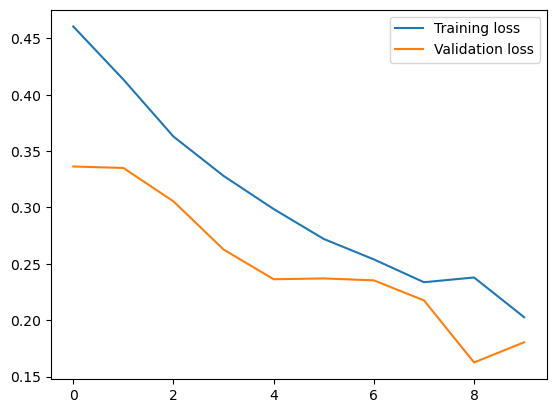

In [12]:
# model.evaluate(x_test, y_test)
loss = model.evaluate(x_test, y_test)

# 繪製訓練歷史
plt.plot(history.history['loss'][10:], label='Training loss')
plt.plot(history.history['val_loss'][10:], label='Validation loss')
plt.legend()
plt.show()

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy*100}%')


1/1 [==============================] - 0s 40ms/step - loss: 0.1740 - accuracy: 1.0000
Accuracy: 100.0%


In [14]:
y_pred = model.predict(x_test)
print((y_pred),(y_test))

1/1 [==============================] - 0s 100ms/step
[[1.4495860e-01 8.5298479e-01 2.0566697e-03]
 [6.0790366e-01 5.5324711e-02 3.3677161e-01]
 [4.9959026e-02 9.4826669e-01 1.7743030e-03]
 [9.5438308e-01 2.3055820e-02 2.2560943e-02]
 [7.2782534e-01 4.0480327e-02 2.3169428e-01]
 [8.0116522e-03 9.9165195e-01 3.3648690e-04]
 [8.0935940e-02 9.1809618e-01 9.6779637e-04]
 [1.9630960e-01 4.5672697e-03 7.9912305e-01]] [1 0 1 0 0 1 1 2]


1/1 [==============================] - 0s 30ms/step


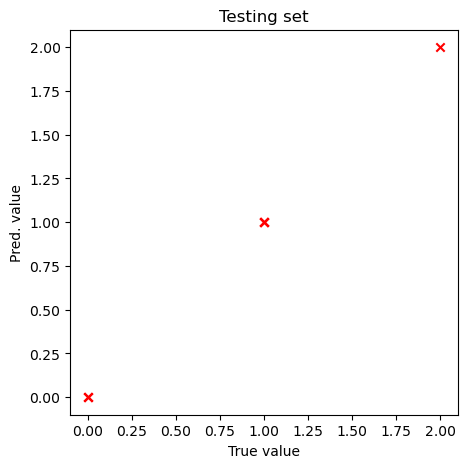

1/1 [==============================] - 0s 23ms/step


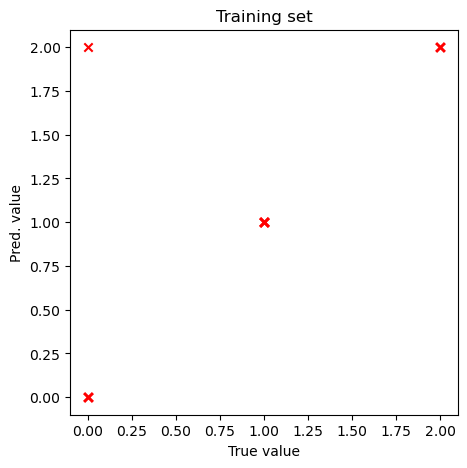

In [15]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)


plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
y_pred = np.argmax(y_pred, axis=1)

plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


In [16]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_train)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_train, y_pred)

# 打印混淆矩陣
print("Confusion Matrix:")
print(cm)

1/1 [==============================] - 0s 21ms/step
Confusion Matrix:
[[ 8  0  1]
 [ 0 12  0]
 [ 0  0  7]]


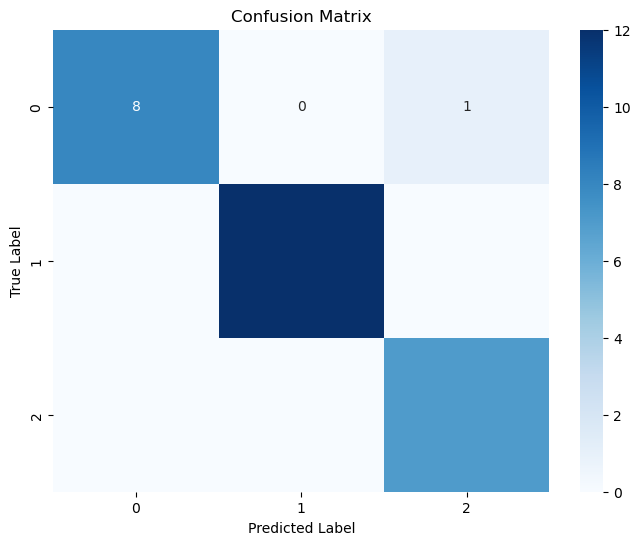

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製混淆矩陣的熱圖
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()